In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('Final Data');
#Normalize data
scaledData = preprocessing.MinMaxScaler().fit_transform(df.values);
df = pd.DataFrame(scaledData, index = df.index, columns = df.columns);
print(df.describe());

             PRCP        TMAX  5 second wind speed squared  \
count  318.000000  318.000000                   318.000000   
mean     0.075122    0.619488                     0.109774   
std      0.148938    0.205566                     0.185419   
min      0.000000    0.000000                     0.000000   
25%      0.000000    0.450980                     0.015994   
50%      0.011662    0.663501                     0.036915   
75%      0.072998    0.779412                     0.109737   
max      1.000000    1.000000                     1.000000   

       2 min wind speed squared  Avg Wind Speed Squared     Fog/Ice  \
count                318.000000              318.000000  318.000000   
mean                   0.108352                0.174002    0.511540   
std                    0.136324                0.186327    0.442045   
min                    0.000000                0.000000    0.000000   
25%                    0.032261                0.054280    0.000000   
50%            

In [11]:
df = df[['Power Outage','2 min wind speed squared','Avg Wind Speed Squared','5 second wind speed squared','Fog/Ice' ,'Heavy/Freezing Fog']];

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Power Outage'], test_size=0.33, random_state = 1234);

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=12345);
rf.fit(X_train, y_train);

In [14]:
from sklearn.metrics import accuracy_score

pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred);

print(f'Score estimate:{rf.oob_score_:.3}');
print("Accuracy: ", accuracy);
print(rf.feature_importances_)

Score estimate:0.948
Accuracy:  0.942857142857
[ 0.11953034  0.0867079   0.32523717  0.30420419  0.16432039]


Accuracy:  0.942857142857


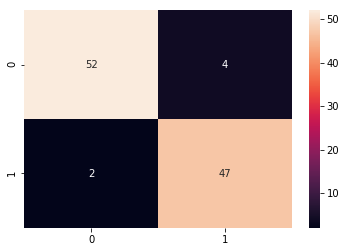

In [15]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);
print("Accuracy: ", accuracy);
plt.show();